Setul 1

Rezolvat in SageMath, versiunea 10.0

In [1]:
%display latex

# 1

- 2p coeficientii
- 2p restul

$$
\int_0^{\infty}e^{-t}f(t)dt=A_1f(0)+A_2f'(0)+A_3f(t_3)+A_4f(t_4)+R(f)
$$

Deducem pe $R(f)$:

$$
R(f)=\int_0^{\infty}e^{-t}f(t)dt-A_1f(0)-A_2f'(0)-A_3f(t_3)-A_4f(t_4)
$$

In [2]:
f = function("f")
t = var("t")
A1, A2, A3, A4 = var("A1 A2 A3 A4")
t3, t4 = var("t3 t4")

poly = A1*f(0) + A2*diff(f(t), t)(t=0) + A3*f(t3) + A4*f(t4)
display(poly)

R = integral(e**(-t) * f(t), t, 0, oo) - poly
display(R)

A1*f(0) + A3*f(t3) + A4*f(t4) + A2*D[0](f)(0)

-A1*f(0) - A3*f(t3) - A4*f(t4) - A2*D[0](f)(0) + integrate(e^(-t)*f(t), t, 0, +Infinity)

Fixăm că $R(f)=0$, pentru $f\in\mathbb{P}_5$ polinoame până în gradul $5$, ca să obținem o cuadratură cu grad de exactitate $d=5$. Rezolvăm sistemul care rezultă.

In [3]:
sol = solve([
    R.substitute_function(f, (t**0).function(t)) == 0,
    R.substitute_function(f, (t**1).function(t)) == 0,
    R.substitute_function(f, (t**2).function(t)) == 0,
    R.substitute_function(f, (t**3).function(t)) == 0,
    R.substitute_function(f, (t**4).function(t)) == 0,
    R.substitute_function(f, (t**5).function(t)) == 0,
], [A1, A2, A3, A4, t3, t4])
sol = sol[0]
display(sol)

polys = poly.substitute(sol)
display(polys)

[A1 == (11/18), A2 == (1/6), A3 == (3/8), A4 == (1/72), t3 == 2, t4 == 6]

1/72*f(6) + 3/8*f(2) + 11/18*f(0) + 1/6*D[0](f)(0)

Am obținut o cuadratură, pentru care restul $R(f)$ mapează toate polinoamele cu grad $n\le d=5$ în $0$. Putem aplica teorema lui Peano.

In [4]:
Rs = R.substitute(sol)
Rs

-1/72*f(6) - 3/8*f(2) - 11/18*f(0) + integrate(e^(-t)*f(t), t, 0, +Infinity) - 1/6*D[0](f)(0)

Calculăm nucleul lui Peano

In [5]:
u = var("u")

In [6]:
d = 5

Avem $x,u\in[0,\infty)$.

In [7]:
K = (
    1 / factorial(d)
    * Rs.substitute_function(
        f, max_symbolic((t-u)**d, 0).function(t)
    )
).function(u)
display(K)

u |--> -1/144*u^4*D[0](max)(-u^5, 0) + 1/120*integrate(e^(-t)*max((t - u)^5, 0), t, 0, +Infinity) - 1/320*max(-(u - 2)^5, 0) - 1/8640*max(-(u - 6)^5, 0) - 11/2160*max(-u^5, 0)

Considerând că $x,u\in[0,\infty)$, atunci $(-u^5)_+\equiv0$, și $\frac{\partial}{\partial u}((-u^5)_+)\equiv0$. Totodată, $\int_0^u e^{-t}(t-u)^5_+dt=\int_0^u e^{-t}\cdot0 dt=0$, așadar putem înlocui integrala cu $\int_u^\infty e^{-t}(t-u)^5_+ dt=\int_u^\infty e^{-t}(t-u)^5 dt$.

Rămânem cu:

In [8]:
K = (
    1/120 * integral(e**(-t) * (t-u)**5, t, u, oo)
    - 1/320 * max_symbolic(-(u-2)**5, 0)
    - 1/8640 * max_symbolic(-(u-6)**5, 0)
).function(u)
K

u |--> e^(-u) - 1/320*max(-(u - 2)^5, 0) - 1/8640*max(-(u - 6)^5, 0)

Abordam determinarea semnului pe intervale:

Cazul $u\in[0, 2)$:

u |--> 1/320*(u - 2)^5 + 1/8640*(u - 6)^5 + e^(-u)

0

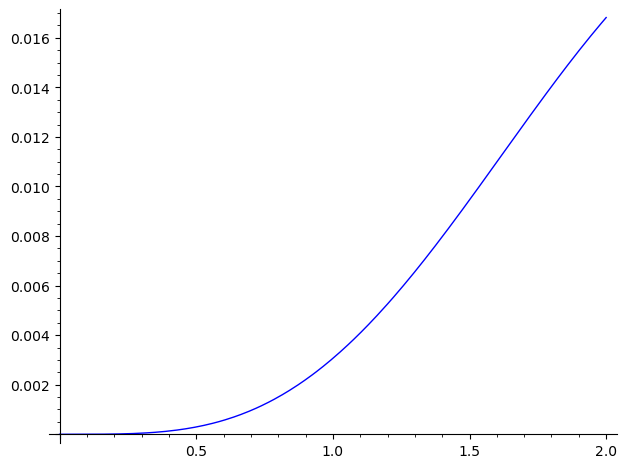

In [9]:
with assuming(-(u - 2)**5 > 0, -(u - 6)**5 > 0):
    Ks = K.simplify()
    display(Ks)
    display(Ks(0))
    plot(Ks, (0, 2)).show()

$K$ este strict crescator pe acest interval, si $K(0)=0$, deci $K(u)\ge0,\forall u\in[0,2)$

Cazul $u\in[2, 6)$:

u |--> 1/8640*(u - 6)^5 + e^(-u)

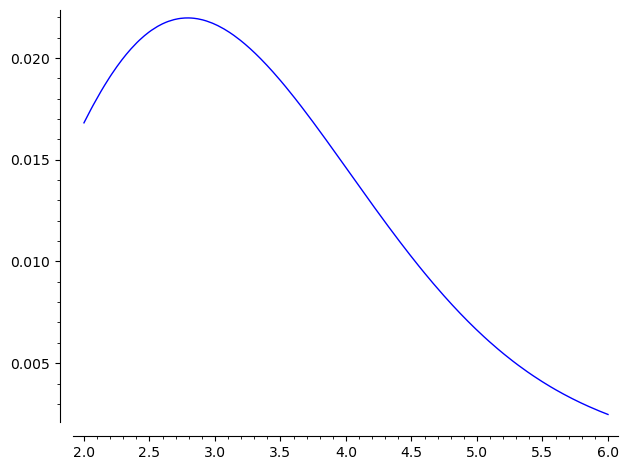

In [10]:
with assuming(-(u - 2)**5 <= 0, -(u - 6)**5 > 0):
    Ks = K.simplify()
    display(Ks)
    plot(Ks, (2, 6)).show()

Din grafic se poate observa ca $K(u)\ge0,\forall u\in[2,6)$.

Cazul $u\in[6,\infty)$:

In [11]:
with assuming(-(u - 2)**5 <= 0, -(u - 6)**5 <= 0):
    Ks = K.simplify()
    display(Ks)

u |--> e^(-u)

$K(u)=e^{-u}\ge0,\forall u\in[6,\infty)$.

Așadar nucleul lui Peano $K(u)$ are același semn, $K(u)\ge0,\forall u\in[0,\infty)$.

Putem aplica corolarul teoremei lui Peano. Dacă $f^{(n+1)}$ este continuă pe $[0,\infty)$, atunci există $\xi\in[0,\infty)$ astfel încât:

In [12]:
xi = var("xi")
Rf = var("Rf")
Rfv = 1 / factorial(d+1) * diff(f(t), t, d+1)(t=xi) * Rs.substitute_function(f, (t**(d+1)).function(t))
display(Rf == Rfv)

Rf == 1/720*(integrate(t^6*e^(-t), t, 0, +Infinity) - 672)*diff(f(xi), xi, xi, xi, xi, xi, xi)

Simplificăm $Rf$:

In [13]:
display(Rf == Rfv.simplify())

Rf == 1/15*diff(f(xi), xi, xi, xi, xi, xi, xi)

# 2

- 2p verificare convergenta
- 1p implementarea in MATLAB
- 1p rezolvarea ecuatiei

## (a)

Fie ecuația $f(x)=0$, $f:[a,b]\mapsto\mathbb{R}$, $f\in C^3[a,b]$, și $\alpha$ o rădăcină simplă a ei.

In [14]:
f = function("f")
x = var("x")

Definim pasul iterației ca fiind $g(x)$.

$x_{k+1}=g(x_k)$

In [15]:
g = (
    x - f(x) / sqrt(
        diff(f(x), x)(x=x)**2 - f(x)*diff(f(x), x, 2)(x=x)
    )
).function(x)
display(g)

x |--> x - f(x)/sqrt(diff(f(x), x)^2 - f(x)*diff(f(x), x, x))

In [16]:
alpha = var("alpha")
g(alpha).substitute(f(alpha) == 0)

alpha

Avem $g(\alpha)=\alpha$, deci $\alpha$ este un punct fix.

In [17]:
gd = diff(g(x), x)
gd(x=alpha).substitute(f(alpha) == 0).simplify_full()

(sqrt(diff(f(alpha), alpha)^2) - diff(f(alpha), alpha))/sqrt(diff(f(alpha), alpha)^2)

Dacă presupunem că $f'(\alpha)\gt0$, atunci $g'(\alpha)=0$. Altfel, $g'(\alpha)=2$.

In [18]:
gdd = diff(gd, x)
gdd(x=alpha).substitute(f(alpha) == 0).simplify_full()

0

Așadar, $g''(\alpha)=0$.

In [19]:
gddd = diff(gdd, x)
gddd(x=alpha).substitute(f(alpha) == 0).simplify_full()

1/4*(3*diff(f(alpha), alpha, alpha)^2 - 4*diff(f(alpha), alpha)*diff(f(alpha), alpha, alpha, alpha))/(sqrt(diff(f(alpha), alpha)^2)*diff(f(alpha), alpha))

Considerăm că $g'''(\alpha)\ne0$.

Presupunând că $f'(\alpha)\gt0$, atunci:

Deoarece $g(\alpha)=\alpha$, $g'(\alpha)=g''(\alpha)=0$, inseamnă că ordinul de convergență este cel puțin $p=3$, ordin de convergență cubic. Dacă considerăm că $g'''(\alpha)\ne0$, atunci cunoaștem sigur că ordinul de convergență este fix $p=3$ (teoremă).

## (b)

Implementarea metodei (SageMath).

In [20]:
def iterate_approx(x0, f, eps, max_iter=100):
    x = var("x")
    g = (
        x - f(x=x) / sqrt(
            diff(f(x=x), x)(x=x)**2 - f(x=x)*diff(f(x=x), x, 2)(x=x)
        )
    ).function(x)
    
    for _ in range(max_iter):
        x1 = g(x0).n()
        if abs(x1 - x0) < eps:
            return x1
        x0 = x1
    
    raise RuntimeError(f"couldn't reach desired accuracy in {max_iter} iterations")

## (c)

In [21]:
x = var("x")
f = x * e**x - 1
display(f)

iterate_approx(
    0,
    f,
    10**-10,
)

x*e^x - 1

0.567143290409784

In [22]:
display(diff(f, x))
display(diff(f, x, 2))

x*e^x + e^x

x*e^x + 2*e^x